# MPI Assignments

### Exercise 1: Hello World
1. Write an MPI program which prints the message "Hello World"
2. Modify your program so that each process prints out both its rank and the total number of processes P that the code is running on, i.e. the size of `MPI_COMM_WORLD`.
3. Modify your program so that only a single controller process (e.g. rank 0) prints out a message (very useful when you run with hundreds of processes).
4. What happens if you omit the final MPI procedure call in your program?

### Exercise 2: Sharing Data
Create a program that obtains an integer input from the terminal and distributes it to all the MPI processes.
Each process must display its rank and the received value. 
Keep reading values until a negative integer is entered.
**Output Example**
```shell
10
Process 0 got 10
Process 1 got 10
```

### Exercise 3 Sending in a ring (broadcast by ring)

Write a program that takes data from process zero and sends it to all of the other processes by sending it in a ring. That is, process i should receive the data add the rank of the process to it then send it to process i+1, until the last process is reached.
Assume that the data consists of a single integer. Process zero reads the data from the user.
print the process rank and the value received.


![ring](data/ring.gif)

You may want to use these MPI routines in your solution:
`Send` `Recv` 

### Exercise 4 Matrix vector product

1. Use the `MatrixVectorMult.py` file to implement the MPI version of matrix vector multiplication.
2. Process 0 compares the result with the `dot` product.
3. Plot the scalability of your implementation. 

**Output Example**
```shell
CPU time of parallel multiplication using 2 processes is  174.923446
The error comparing to the dot product is : 1.4210854715202004e-14
```

### Exercise 5: Pi calculation
An approximation to the value π can be obtained from the following expression

![Pi expression](data/pi.PNG)

where the answer becomes more accurate with increasing N. Iterations over i are independent so the
calculation can be parallelized.

For the following exercises you should set N = 840. This number is divisible by 2, 3, 4, 5, 6, 7 and 8
which is convenient when you parallelize the calculation!

1. Create a program where each process independently computes the value of `π` and prints it to the screen. Check that the values are correct (each process should print the same value)
2. Now arrange for different processes to do the computation for different ranges of i. For example, on two processes: rank 0 would do i = 0, 1, 2, . . . , N/2 - 1; rank 1 would do i = N/2, N/2 + 1, . . . , N-1.
Print the partial sums to the screen and check the values are correct by adding them up by hand.
3. Now we want to accumulate these partial sums by sending them to the controller (e.g. rank 0) to add up:
- all processes (except the controller) send their partial sum to the controller
- the controller receives the values from all the other processes, adding them to its own partial sum
*N.B You should use the `MPI` routines `MPI_Ssend` and `MPI_Recv`.*
4. Use the function `MPI_Wtime` (see below) to record the time it takes to perform the calculation. For a given value of N, does the time decrease as you increase the number of processes? Note that to ensure that the calculation takes a sensible amount of time (e.g. more than a second) you will probably have to perform the calculation of `π` several thousands of times.
5. Ensure your program works correctly if N is not an exact multiple of the number of processes P

### Exercise 4: Scattering Matrix
1. Create an n by m matrix A on processor 0.
2. Use MPI_Scatterv to send parts of the matrix to the other processors.
3. Processor 1 receives A(i,j) for i=0 to (n/2)-1 and j=m/2 to m-1.
4. Processor 2 receives A(i,j) for i=n/2 to n-1 and j=0 to (m/2)-1.
5. Processor 3 receives A(i,j) for i=n/2 to n-1 and j=m/2 to m-1.
**Example:** using n=m=8 for simplicity.


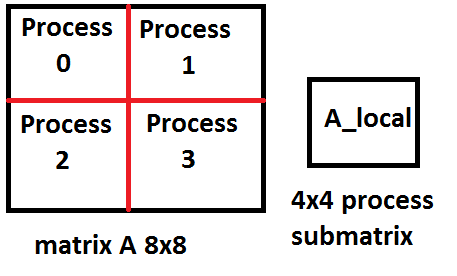




# Exercise 1 : Hello world

In [32]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install --user mpi4py

  Using cached mpi4py-3.1.4.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for mpi4py (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [404 lines of output]
      running bdist_wheel
      running build
      running build_src
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-39
      creating build/lib.linux-x86_64-cpython-39/mpi4py
      copying src/mpi4py/bench.py -> build/lib.linux-x86_64-cpython-39/mpi4py
      copying src/mpi4py/__init__.py -> build/lib.linux-x86_64-cpython-39/mpi4py
      copying src/mpi4py/run.py -> build/lib.linux-x86_64-cpython-39/mpi4py
      copying src/mpi4py/__main__.py -> build/lib.linux-x86_64-cpython-39/mpi4py
      creating build/lib.linux-x86_64-cpython-39/mpi4py/futures
      copying src/mpi4py/futures/__init__.py -> build/lib.linux

Note: you may need to restart the kernel to use updated packages.


### 1

In [16]:
%%writefile hello_world.py
from mpi4py import MPI


def f1():
    print('Hello world !')
    
f1()

Overwriting hello_world.py


In [17]:
!mpirun --oversubscribe -n 8 python3 hello_world.py

Hello world !
Hello world !
Hello world !
Hello world !
Hello world !
Hello world !
Hello world !
Hello world !


### 2

In [18]:
%%writefile hello_world_.py
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

print("Hello World from rank %d of %d" % (rank, size))

MPI.Finalize()

Overwriting hello_world_.py


In [19]:
!mpirun --oversubscribe -n 8 python3 hello_world_.py

Hello World from rank 2 of 8
Hello World from rank 1 of 8
Hello World from rank 7 of 8
Hello World from rank 4 of 8
Hello World from rank 0 of 8
Hello World from rank 3 of 8
Hello World from rank 5 of 8
Hello World from rank 6 of 8


### 3

In [20]:
%%writefile hello_world_1.py
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    print("Hello World from controller process")
else:
    print("Hello World from worker process %d" % rank)

MPI.Finalize()


Overwriting hello_world_1.py


In [21]:
!mpirun --oversubscribe -n 8 python3 hello_world_1.py

Hello World from worker process 1
Hello World from worker process 7
Hello World from controller process
Hello World from worker process 5
Hello World from worker process 3
Hello World from worker process 2
Hello World from worker process 6
Hello World from worker process 4


###  4

If you omit the *MPI.Finalize()* call at the end of the program, the MPI environment will not be properly cleaned up, which can result in undefined behavior. In practice, this can cause issues like hanging processes, segmentation faults, or other errors. Therefore, it's important to always call MPI.Finalize() at the end of your MPI program to ensure that the MPI environment is properly cleaned up.

# Exercise 2 : Sharing Data

In [29]:
%%writefile Ex_2.py
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    while True:
        value =  -4 #int(input("Enter a value (negative to exit): "))
        if value < 0:
            break
        comm.bcast(value, root=0)
else:
    while True:
        value = comm.bcast(None, root=0)
        if value < 0:
            break
        print(f"Process {rank} got {value}")



Overwriting Ex_2.py


In [31]:
!mpirun --oversubscribe -n 5 python3 Ex_2.py

^C


In [27]:
# Exo2
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

while True:
    if rank == 0:
        value = int(input("Enter an integer: "))
        if value < 0:
            break
        comm.bcast(value, root=0)
    else:
        value = comm.bcast(None, root=0)
    print("Process", rank, "got", value)
MPI.Finalize()

ModuleNotFoundError: No module named 'mpi4py'

## Exercise 3 Sending in a ring (broadcast by ring)

In [15]:
%%writefile Ex_3.py
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    data = int(input("Enter a value: "))
    comm.send(data, dest=1)
    print(f"Process {rank} sent {data}")
elif rank == size-1:
    data = comm.recv(source=rank-1)
    data += rank
    comm.send(data, dest=0)
    print(f"Process {rank} received {data}")
else:
    data = comm.recv(source=rank-1)
    data += rank
    comm.send(data, dest=rank+1)
    print(f"Process {rank} received {data}")

In [ ]:
!mpirun --oversubscribe -n 5 python3 Ex_3.py